# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Hoàng Anh Trà
- MSSV: 21127453
- Lớp: 21CLC10

# Import

In [109]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [110]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [111]:
# Cài đặt các hàm cần thiết ở đây

# OLS từ Lab 04 cô Uyên
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X): # y_hat
        return np.sum(self.w.ravel() * X, axis=1)   

# MAE từ Lab04 cô Uyên nốt
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

In [112]:
def KFoldCrossValidation(X, Y, k = 5, i = 0):
    if (X.shape[0] == Y.shape[0]):
        size = X.shape[0]
    else:
        return
    
    test_size = size // k
    test_i = (i % k)*test_size
    test_j = test_i + test_size
    
    X_test = X.copy().iloc[test_i: test_j, :]
    y_test = Y.copy().iloc[test_i: test_j]
    
    X_train = X.copy().drop(range(test_i, test_j))
    y_train = Y.copy().drop(range(test_i, test_j))
    
    return X_train, X_test, y_train, y_test

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [113]:
# Phần code cho yêu cầu 1a

# Trích 11 đặc trưng đầu tiên từ train và test
X_train_1a = train.iloc[:, :11]
X_test_1a = test.iloc[:, :11]

# Huấn luyện 1 lần duy nhất cho X_train_1a
model_1a = OLSLinearRegression().fit(X_train_1a, y_train)
model_1a.get_params()


0    -22756.512821
1       804.503156
2      1294.654565
3    -91781.897531
4     23182.388679
5      1437.548672
6     -8570.661985
7       147.858299
8       152.888476
9       117.221846
10    34552.286221
dtype: float64

In [114]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat_1a = model_1a.predict(X_test_1a)
print("MAE: ", mae(y_test, y_hat_1a))

MAE:  104863.7775403321


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$
\text{Salary} = -22756.513X_1 + 804.503X_2 + 1294.655X_3 + (-91781.898)X_4 + 23182.389X_5 + 1437.549X_6 + (-8570.662)X_7 + 147.858X_8 + 152.888X_9 + 117.222X_{10} + 34552.286X_{11}
$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [115]:
# Phần code cho yêu cầu 1b

# Xáo trộn các hàng với nhau 1 lần duy nhất
# https://hanghieugiatot.com/huong-dan-dung-pandas-shuffle-python
train_shuffle = train.sample(frac=1).reset_index(drop=True)

# Tiếp tục trích dữ liệu
X_train_1b = train_shuffle.iloc[:, 18:23]
y_train_1b = train_shuffle.iloc[:, -1]  

X_test_1b = test.iloc[:, 18:23]

# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
# Tham khảo từ: https://github.com/NgocTien0110/Applied-Mathematics-and-Statistics
feature = X_train_1b.columns.values
maes = []
k = 10
for label in feature:
    x_train_this = pd.Series.to_frame(X_train_1b[label]).copy()
    y_train_this = y_train_1b.copy()
    # https://v1study.com/python-tham-khao-tach-tap-du-lieu-cua-ban-voi-train_test_split-cua-scikit-learning.html
    # https://scikit-learn.org/stable/modules/cross_validation.html
    MAE = 0
    for i in range(k):
        train_X, test_X, train_y, test_y = KFoldCrossValidation(x_train_this, y_train_this, k, i)
        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)
        MAE += mae(test_y, lr.predict(test_X))
    maes.append([label, MAE/k])


best_mae = sorted(maes, key=lambda x: x[1])[0]
print('The best feature is:', best_mae[0], "with k =", k)

report = pd.DataFrame(maes, columns=['Feature', 'MAE'])
report

The best feature is: nueroticism with k = 10


,Feature,MAE
0,conscientiousness,306195.166397
1,agreeableness,300870.326218
2,extraversion,307089.059148
3,nueroticism,299202.865669
4,openess_to_experience,302894.054103


In [116]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_personality_feature_model = OLSLinearRegression().fit(X_train_1b[best_mae[0]].values.reshape(-1, 1), y_train_1b)
best_personality_feature_model.get_params()

array([-56546.30375318])

In [117]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
y_hat_best = best_personality_feature_model.predict(X_test_1b[best_mae[0]].values.reshape(-1, 1))
print('MAE:', mae(y_test, y_hat_best))

MAE: 291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 \times nueroticism$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [118]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Xáo trộn các hàng với nhau 1 lần duy nhất
# https://hanghieugiatot.com/huong-dan-dung-pandas-shuffle-python
train_shuffle = train.sample(frac=1).reset_index(drop=True)

# Tiếp tục trích dữ liệu
X_train_1c = train_shuffle.iloc[:, 7:10]
y_train_1c = train_shuffle.iloc[:, -1]  

X_test_1c = test.iloc[:, 7:10]

# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
feature = X_train_1c.columns.values
maes = []
k = 10
for label in feature:
    x_train_this = pd.Series.to_frame(X_train_1c[label]).copy()
    y_train_this = y_train_1c.copy()
    MAE = 0
    for i in range(k):
        train_X, test_X, train_y, test_y = KFoldCrossValidation(x_train_this, y_train_this, k, i)
        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)
        MAE += mae(test_y, lr.predict(test_X))
    maes.append([label, MAE/k])


best_mae = sorted(maes, key=lambda x: x[1])[0]
print('The best feature is:', best_mae[0], "with k =", k)

report = pd.DataFrame(maes, columns=['Feature', 'MAE'])
report

The best feature is: Quant with k = 10


,Feature,MAE
0,English,122171.631729
1,Logical,120484.287774
2,Quant,118296.723714


In [119]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_skill_feature_model = OLSLinearRegression().fit(X_train_1c[best_mae[0]].values.reshape(-1, 1), y_train_1c)
best_skill_feature_model.get_params()

array([585.89538084])

In [120]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
y_hat_best = best_skill_feature_model.predict(X_test_1c[best_mae[0]].values.reshape(-1, 1))
print('MAE:', mae(y_test, y_hat_best))

MAE: 106819.5776198967


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 \times Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

10percentage:


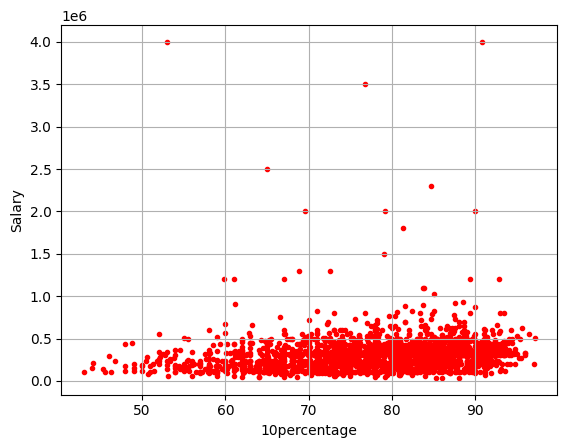

12percentage:


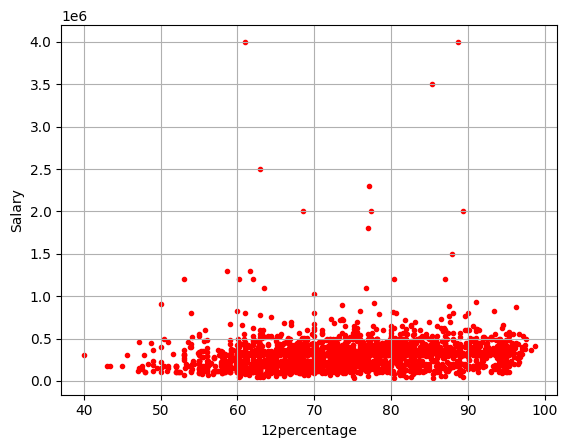

CollegeTier:


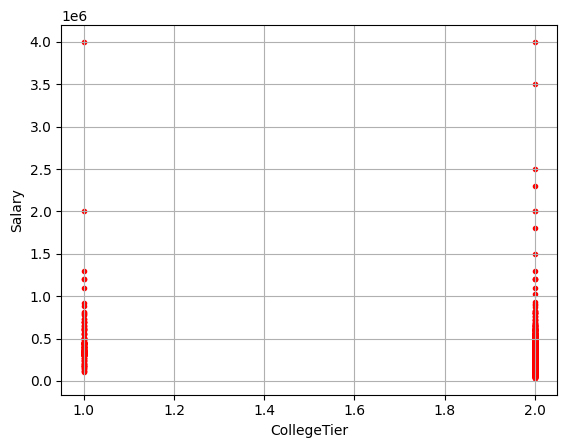

Degree:


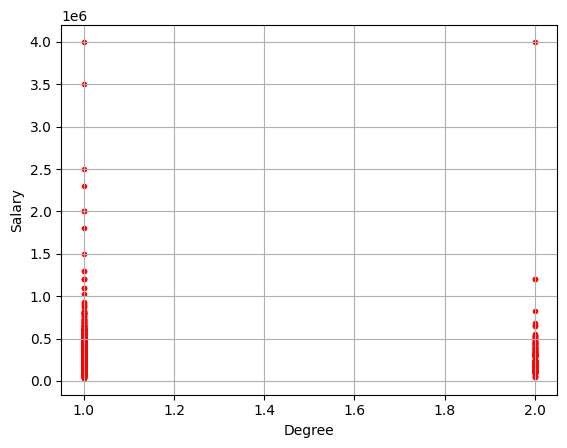

collegeGPA:


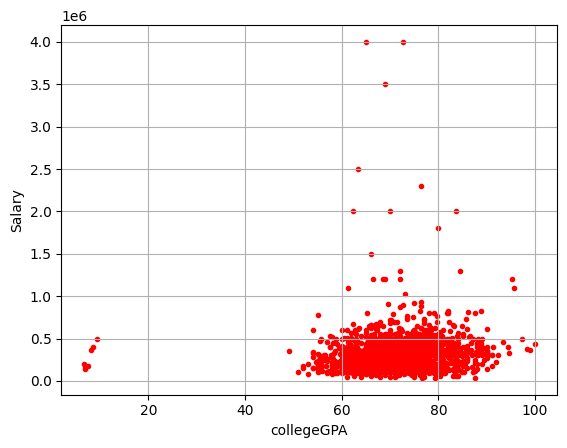

In [121]:
# Trình bày các phần tìm ra mô hình

# Sử dụng matplotlib xây dựng biểu đồ phân bố để đánh giá cụ thể
label = list(train.columns)
for i in range(1, 6):
    X, y = X_train.to_numpy()[:, i].reshape(-1,1), y_train.to_numpy().reshape(-1,1)
    print(f'{label[i]}:')
    
    plt.scatter(X, y, color='r', marker='.')
    
    plt.xlabel(f'{label[i]}')
    plt.ylabel('Salary')
  
    plt.grid()
    plt.show()

### Mô hình đầu tiên

Ý tưởng chính: Phân tích và đánh giá sức ảnh hưởng của Tổng điểm đạt được trong kỳ thi lớp 10, lớp 12 tới Salary. 

$$ Salary = a \times 10percentage + b \times 12percentage $$

### Mô hình thứ 2

Ý tưởng chính: Phân tích và đánh giá sức ảnh hưởng của GPA tại thời điểm tốt nghiệp và Loại bằng cấp đã đạt tới Salary. 

$$ Salary = a \times College GPA \times Degree $$

### Mô hình thứ 3
Dựa vào các biểu đồ điểm số trong kỳ thi lớp 10, 12 và GPA tốt nghiệp ở trên khá tương đương nhau giống như ở trên nhưng kèm theo các tiêu chí phụ như loại bằng, hạng của trường mà ứng viên đó đã theo học.

Ý tưởng chính: Phân tích và đánh giá sức ảnh hưởng của Tổng điểm đạt được trong kỳ thi lớp 10, lớp 12, GPA tại thời điểm tốt nghiệp và Loại bằng cấp đã đạt, hạng của trường tới Salary. 

$$ Salary = a \times 10percentage^2 + b \times 12percentage^2 + c \times (\frac{College GPA \times Degree}{College Tier})^2 $$


In [122]:
def preprocess_2(main_df):
    X_train_2 = main_df.iloc[:, [5]]
    df = main_df.iloc[:, [4]].astype('float64')
    
    mult = lambda s1, s2: s1@s2 if s1.sum() != s2.sum() else s1

    X_train_2.combine(df, mult)
    
    return X_train_2

def preprocess_3(main_df):
    X_train_3 = main_df.iloc[:, [1, 2, 5]]
    df = main_df.iloc[:, [1, 2, 4]].astype('float64')
    df2 = main_df.iloc[:, [1, 2, 3]].astype('float64').pow([1, 1, -1])
    
    mult = lambda s1, s2: s1@s2 if s1.sum() != s2.sum() else s1

    X_train_3.combine(df, mult)
    X_train_3.combine(df2, mult)
    
    return X_train_3.pow([2, 2, 2])

In [123]:
# xáo trộn dữ liệu 1 lần duy nhất
train_shuffle = train.sample(frac=1).reset_index(drop=True)

X_train_1d = []
X_test_1d = []
y_train_1d = train_shuffle.iloc[:, -1]

# Mô hình 1
X_train_1d.append(train_shuffle.iloc[:, [1, 2]])
X_test_1d.append(test.iloc[:, [1, 2]])

# Mô hình 2
X_test_1d.append(preprocess_2(test))
X_train_1d.append(preprocess_2(train_shuffle))

# Mô hình 3
X_test_1d.append(preprocess_3(test))
X_train_1d.append(preprocess_3(train_shuffle))


## Thử nghiệm, so sánh các mô hình

In [124]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

# MAE
list_mae = []
label = ["First Model", "Second Model", "Third Model"]
k = 5
for i in range(3):
    MAE = 0
    for j in range(k):
        train_X, test_X, train_y, test_y = KFoldCrossValidation(X_train_1d[i], y_train_1d, k, i)
        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)
        MAE += mae(test_y, lr.predict(test_X))
    list_mae.append(MAE/k)

best_idx = list_mae.index(min(list_mae))
print('The best model is:', label[best_idx])
report = pd.Series(list_mae, index=label).to_frame(name="MAE")
report


The best model is: Third Model


,MAE
First Model,139565.103851
Second Model,121272.874052
Third Model,112752.961711


In [125]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
my_best_model = OLSLinearRegression().fit(X_train_1d[best_idx], y_train_1d)
my_best_model.get_params()

0    19.116581
1     9.032530
2    26.315431
dtype: float64

In [126]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
y_hat_best = my_best_model.predict(X_test_1d[best_idx])
print('MAE:', mae(y_test, y_hat_best))

MAE: 108453.7229204965


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$ Salary = 19.117 \times 10percentage^2 + 9.033 \times 12percentage^2 + 26.315 \times (\frac{College GPA \times Degree}{College Tier})^2 $$